# Assembly of the pGREEN LANTERN™-1 sequence

pGreen Lantern-1 is a plasmid expressing humanized GFP from a [CMV](http://blog.addgene.org/plasmids-101-the-promoter-region) promoter. This plasmid can be used [monitor transfection](https://tools.thermofisher.com/Content/Focus/Focus%20Volume%2018%20Issue%202.pdf) of human cells for example.

This plasmid was marketed by Gibco under the catalog number 10642. Gibco merged into Life Technologies which was later bought by Thermo Fisher Scientific and the plasmid is no longer available commercially.

Unfortunately this means that the plasmid sequence is also unavailable.

There was a [recent exchange](https://groups.google.com/forum/#!topic/bionet.molbio.methds-reagnts/_oeYALCz6_U) on the bionet.molbio.methds-reagnts newsgroup where the sequence was requested.

On of the [posts](https://groups.google.com/forum/#!topic/bionet.molbio.methds-reagnts/b43z7j5_Qzo) by Dr. Barbara MacGregor, University of North Carolina contained a compilation that could be used in order to compile the sequence.

The post by Dr. MacGregor lists three sources:

1. [Life Technologies Focus 96, Vol. 18, Number 2](https://tools.thermofisher.com/Content/Focus/Focus%20Volume%2018%20Issue%202.pdf)  

2. The original reference: [Zolotukhin et al. (1996) J. Virol. 70:4646-4654](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC190401)

3. The gfp sequence used deposited in GenBank under [U50963](https://www.ncbi.nlm.nih.gov/nuccore/1289497/)

The a reference to #3 is also made in #2 so this should be correct.

Additionally there is a patent where the pGreen Lantern-1 is mentioned:

4. [US6638732B1 Mutants of Green Fluorescent Protein](https://patents.google.com/patent/US6638732B1/en)

The original reference can be seen below:

In [1]:
from IPython.display import HTML
HTML('<iframe src=https://www.ncbi.nlm.nih.gov/pmc/articles/PMC190401 width=900 height=300></iframe>')

The paragraph below was lifted from #2 and describes how the humanized gene(s) were made with a series of overlapping oligonucelotides. Two primers are described that were used to amplify the synthetic gene in order to clone it in the pBS vector. We can assume that the GFP sequence is identical #3. The final product is the pBS_GFPH1 vector.


>**Synthesis of the gfph cDNA.** The gfph cDNA was synthesized by assembling mutually priming synthetic oligonucleotides (Fig. 1). The gene was divided into eight segments of approximately equal length, and four pairs of oligonucleotides were synthesized, each pair consisting of two overlapping oligonucleotides with a short stretch of overlap (underlined in Fig. 1), one coding for the sense strand and the other coding for the antisense strand. After annealing and extension with Sequenase, pairs 1 and 2 were digested with EaeI, whereas pairs 3 and 4 were digested with BamHI. The digested products were then ligated in two separate reactions: pairs 1 and 2 and pairs 3 and 4. Ligation products of the desired length were purified on a 5% polyacrylamide gel under nondenaturing conditions. Both DNA fragments were then digested with EcoRII and ligated to each other. The final product was amplified by PCR, using a pair of oligonucleotides partially complementary to the gfph cDNA (boldface in the sequences presented below) and containing the restriction sites NotI, XbaI, and HindIII (underlined in the sequences presented below) for cloning. The sequence of the upstream primer, which included a Kozak consensus sequence (18), was 59-TGCTCTAGAGCG GCCGCCGCCACCATGAGCAAGGGCGAGGAACTG-39; the downstream primer sequence was 59-CGGAAGCTTGCGGCCGCTCACTTGTACAGCTCGTCCAT- 39. After digestion of the PCR product with XbaI and HindIII, the DNA fragment was cloned into pBS(1) (Stratagene) and sequenced. Several independent clones were isolated and sequenced. These clones had mutations in the coding sequence which presumably either occurred during PCR amplification or were present in the oligonucleotides. Portions of these clones were then spliced together to produce the final gfph gene that encoded a wild-type amino acid sequence. The resulting construct, designated pBS-GFPH1, contained the coding sequence for wild-type GFP. Two mutants were constructed in the pBS-GFPH background by site-directed PCR mutagenesis. One of these converted Ser-65 to Thr and was called pBS-GFPH2; the other converted Tyr-66 to His and was called pBSGFPHB.


We will use [pydna](https://github.com/BjornFJohansson/pydna) to describe the cloning process.

In [2]:
import pydna

we get the gfp gene from Genbank according to #2

In [3]:
humanized_gfp_gene = pydna.genbank('U50963')

The upstream and downstream primers were described in #2

In [4]:
up, dp = pydna.parse_primers('''
>upstream_primer
TGCTCTAGAGCGGCCGCCGCCACCATGAGCAAGGGCGAGGAACTG
>downstream_primer
CGGAAGCTTGCGGCCGCTCACTTGTACAGCTCGTCCAT''')

In [5]:
humanized_gfp_product = pydna.pcr(up, dp, humanized_gfp_gene)

In [6]:
humanized_gfp_product

Dseqrecord(-758)

In [7]:
humanized_gfp_product.figure()

                        5ATGAGCAAGGGCGAGGAACTG...ATGGACGAGCTGTACAAGTGA3
                                                 ||||||||||||||||||||| tm 59.1 (dbd) 64.0
                                                3TACCTGCTCGACATGTTCACTCGCCGGCGTTCGAAGGC5
5TGCTCTAGAGCGGCCGCCGCCACCATGAGCAAGGGCGAGGAACTG3
                         ||||||||||||||||||||| tm 62.7 (dbd) 71.1
                        3TACTCGTTCCCGCTCCTTGAC...TACCTGCTCGACATGTTCACT5

The PCR product contain the entire GFP coding sequence as expected. The PCR product was digested with [XbaI](http://rebase.neb.com/rebase/enz/XbaI.html) and [HindIII](http://rebase.neb.com/rebase/enz/HindIII.html).

We import the restriction enzymes from [BioPython](http://biopython.org/wiki/Biopython):

In [8]:
from Bio.Restriction import XbaI, HindIII

In [9]:
stuffer, gene_fragment, stuffer = humanized_gfp_product.cut(XbaI, HindIII)

In [10]:
gene_fragment

Dseqrecord(-750)

The gene fragment has the expected size and sticky ends:

In [11]:
gene_fragment.seq

Dseq(-750)
CTAGAGCG..CGCA    
    TCGC..GCGTTCGA

The pBS(+) plasmid is also known as [BlueScribe](https://www.snapgene.com/resources/plasmid_files/basic_cloning_vectors/pBS(+) which is available from Genbank under L08783.

In [12]:
pBSplus = pydna.genbank("L08783")

In [13]:
pBS_lin, stuffer = pBSplus.cut(XbaI, HindIII)

A small stuffer fragment is lost upon digestion:

In [14]:
pBS_lin, stuffer

(Dseqrecord(-3184), Dseqrecord(-28))

In [15]:
pBS_GFPH1 = (pBS_lin+gene_fragment).looped()

The pBS_GFPH1 plasmid is 3926 bp long

In [16]:
pBS_GFPH1

Dseqrecord(o3926)

The second paragraph in the Materials section in #2 is harder to follow. The first part describes the construction of a vector with wild type GFP which is substituted for the humanized GFP in the end.

Plasmids referenced are:
1. TU#65
2. [pCMVb](https://plasmid.med.harvard.edu/PlasmidRepository/file/sequence/pCMVbeta.txt)
3. [pRc/CMV](https://www.addgene.org/vector-database/3907/)
4. pTRBR

The TU#65 plasmid is described in:

Chalfie, M., Y. Tu, G. Euskirchen, W. W. Ward, and D. C. Prasher. 1994.
Green fluorescent protein as a marker for gene expression. Science 263:802–
805.

The paper above says very little about the construction or sequence of the TU#65.

The pTRBR plasmid is described in:

Ryan, J. H., Zolotukhin, S., and Muzyczka, N. (1996) Sequence requirements for binding of Rep68 to the adeno-associated virus terminal repeats. J. Virol. 70, 1542–1553.

The construction of pTRBR has more details, but refer to sequences in older papers.

Another problem is that the sequences for PCR primers described below were not given in the publication. Tis makes is almost impossible to follow the cloning strategy without additional information.

What we can say for sure is that the NotI cassette in pBS_GFPH1 containing the humanized GFP is identical to the one in the final pGreen Lantern-1 sequence (see last emphasized text in paragraph below).


>**Construction of rAAV vector plasmids.** Briefly, the gfp10 sequence was subcloned into the NotI site of **pCMVb** (Clontech) after digestion of the parent plasmid TU#65 (4) with AgeI and EcoRI, filling in the ends with Klenow DNA polymerase, and adding NotI linkers. 

>The resulting plasmid, designated **pCMV green**, was then used as a template to amplify in a PCR the transcription cassette containing the cytomegalovirus (CMV) promoter, the simian virus 40 (SV40) intron, the gfp10 cDNA, and the SV40 polyadenylation signal. 

>The upstream PCR primer complementary to the CMV promoter also included an overhang that contained the BglII, EcoRI, and KpnI sites. 

>The downstream PCR primer,complementary to the polyadenylation signal, included a SalI site overhang. 

>The polyadenylation signal of the bovine growth hormone gene was amplified in another PCR using plasmid **pRc/CMV** (Invitrogen) as the template. 

>The upstream primer in this reaction contained a SalI site overhang, and the downstream primer contained a BglII site. After purification of the PCR products on a 1% agarose gel, the respective fragments were digested with SalI and ligated to each other via the exposed SalI ends. 

>The ligation product was gel purified and digested with BglII. The 160-bp BglII-PstI fragment, containing the AAV terminal repeat, was isolated by gel purification from plasmid **pTRBR**(1) (30). 

>This fragment had been subcloned into pTRBR(1) from the previously described plasmid dl3-94 (26). It was then ligated to both ends of the BglII-digested cassette, containing the CMV promoter, SV40 intron, gfp10 cDNA, SV40 poly (A) site, and bovine growth hormone poly(A) site. The ligation product was then cut with PstI and subcloned into plasmid pBS(1) (Stratagene), which had been modified by converting the PvuII sites at positions 766 and 1148 into PstI sites by adding PstI linkers and deleting the internal 382-bp fragment, containing the polylinker region. The resulting plasmid was designated pTRgreen. The neomycin resistance gene (neo) cassette, driven by the herpes simplex virus thymidine kinase gene promoter and the enhancer from polyomavirus, was obtained from plasmid pMClneo (Stratagene) by cutting the plasmid with XhoI, filling in the ends with Klenow DNA polymerase, adding SalI linkers, and digesting with SalI. The DNA fragment containing the neo cassette was gel purified and subcloned into the SalI site of pTRgreen. The resulting construct, pTRBS-UF (UF for user friendly), is depicted in Fig. 2. **To construct pTRBS-UF1, pTRBS-UF2, or pTRBSUFB, we substituted the NotI fragment of pBS-GFPH1 (wild type), pBS-GFPH2 (Thr-65), or pBS-GFPHB (His-66), respectively, for the NotI fragment of pTRBS-UF** (Fig. 2). Any DNA fragment that had undergone PCR amplification was sequenced to confirm the identity of the original sequence.

## 2nd attempt

A google search for pGreen Lantern-1 sequence revealed that there is a plasmid deposited at Addgene where the depositors claim that the backbone in pGreen Lantern-1.

This plasmid is called [pGL-MLKif3B](https://www.addgene.org/13744/).

The construction of this vector is described in:

Ginkel, L. M., and Wordeman, L. (2000) Expression and partial characterization of kinesin-related proteins in differentiating and adult skeletal muscle. Mol. Biol. Cell 11, 4143–4158. [here](https://www.ncbi.nlm.nih.gov/pubmed/11102514)

The paragraph below was lifted from Ginkel et al.:

>***Expression Constructs***The GFP-KIF3B-motorless deletion construct (GFP-KIF3B-ML) was made by modifying GFP-MCAK (Maneyet al., 1998) in pOPRSVI-CAT (Stratagene). Briefly, by using aNdeI site inserted at the junction  of  the  GFP  and  MCAK  coding  regions  by  site-directed  mutagenesis  (QuikChange  site-directed  mutagenesis  kit;  Stratagene), MCAK  was  removed  by NdeI-XhoI  digestion.  Before  making  the GFP-KIF3B-ML,  a  GFP-KIF3B-tail  construct  was  made.  The NdeI/XhoI  fragment  of  KIF3B  used  to  make  the  bacterial  expression construct was inserted into NdeI-XhoI sites of the prepared vector. To make GFP-KIF3B-ML, the incorporated NdeI site was removed and  replaced  with  an  AvrII  site  (QuikChange  site-directed  mutagenesis kit; Stratagene). The fragment of KIF3B corresponding to the coiled-coil plus part of the tail domain (nucleotides 1154 –1888,amino  acids  364 – 609)  was  generated  by  PCR  from  the  isolatedpBluescript II-KIF3B. AvrII and BbsI sites, incorporated into the 59and 39PCR primers, respectively, were used to insert the fragment into  the  AvrII  site  at  the  GFP  junction  and  the  unique  BbsI  site within the tail domain. **The resulting GFP-KIF3B-ML coding region was  removed  from  pOPRSVICAT  with NotI  and  inserted  into pGREEN-LANTERN-1  (Life  Technologies,  Rockville,  MD)  due  to increased expression in C2C12 cells.**

The important part is the final one wich indicate that we can recreate the pGreen Lantern-1 sequence by removing the NotI insert and replacing it with the original insert. 

We know that the NotI insert of pGreen Lantern-1 is the same as for the pBS_GFPH1 vector wich we have. 

We will use this alternative shortcut to try to recreate the sequence:

The pGL-MLKif3B plasmid is difficult to read programatically, here we use the requests and the lxml libraries:

In [17]:
import requests
from lxml import html
r = requests.get('https://www.addgene.org/13744/sequences/')
tree = html.fromstring(r.text)
rawdata_addgene_full_sequence = tree.xpath(".//*[@id='depositor-full']")
pGL_MLKif3B = pydna.read( rawdata_addgene_full_sequence[0].text_content() ).looped()
rawdata_addgene_partial_sequence = tree.xpath(".//*[@id='addgene-partial']")
pGL_MLKif3B_partial = pydna.read( rawdata_addgene_partial_sequence[0].text_content() )
assert len(pGL_MLKif3B) == 6210

The sequence seems to have the correct size:

In [18]:
pGL_MLKif3B

Dseqrecord(o6210)

We cut out the NotI fragment

In [19]:
from Bio.Restriction import NotI

In [20]:
pGL_backbone, Kif3b_GFP = pGL_MLKif3B.cut(NotI)

The remaining backbone sequence is 4304 bp.

In [21]:
pGL_backbone, Kif3b_GFP

(Dseqrecord(-4304), Dseqrecord(-1914))

We cut out the NotI GFP cassette from pBS_GFPH1 

In [22]:
pBS_bb, humanized_gfp_NotI_frag = pBS_GFPH1.cut(NotI)

Then we combine the backbone from pGL_MLKif3B with the insert from pBS_GFPH1

In [23]:
pGreenLantern1 = (pGL_backbone + humanized_gfp_NotI_frag).looped()

the sequence seems to have roughly the correct size (5kb):

In [24]:
pGreenLantern1

Dseqrecord(o5032)

In [25]:
pGreenLantern1.locus="pGreenLantern1"

The candidate for the pGreenLantern1 sequence can be downloaded from the link below.

In [26]:
pGreenLantern1.write("pGreenLantern1.gb")

### [pGreenLantern1](pGreenLantern1.gb)

The plasmid map below is from the patent (#4)

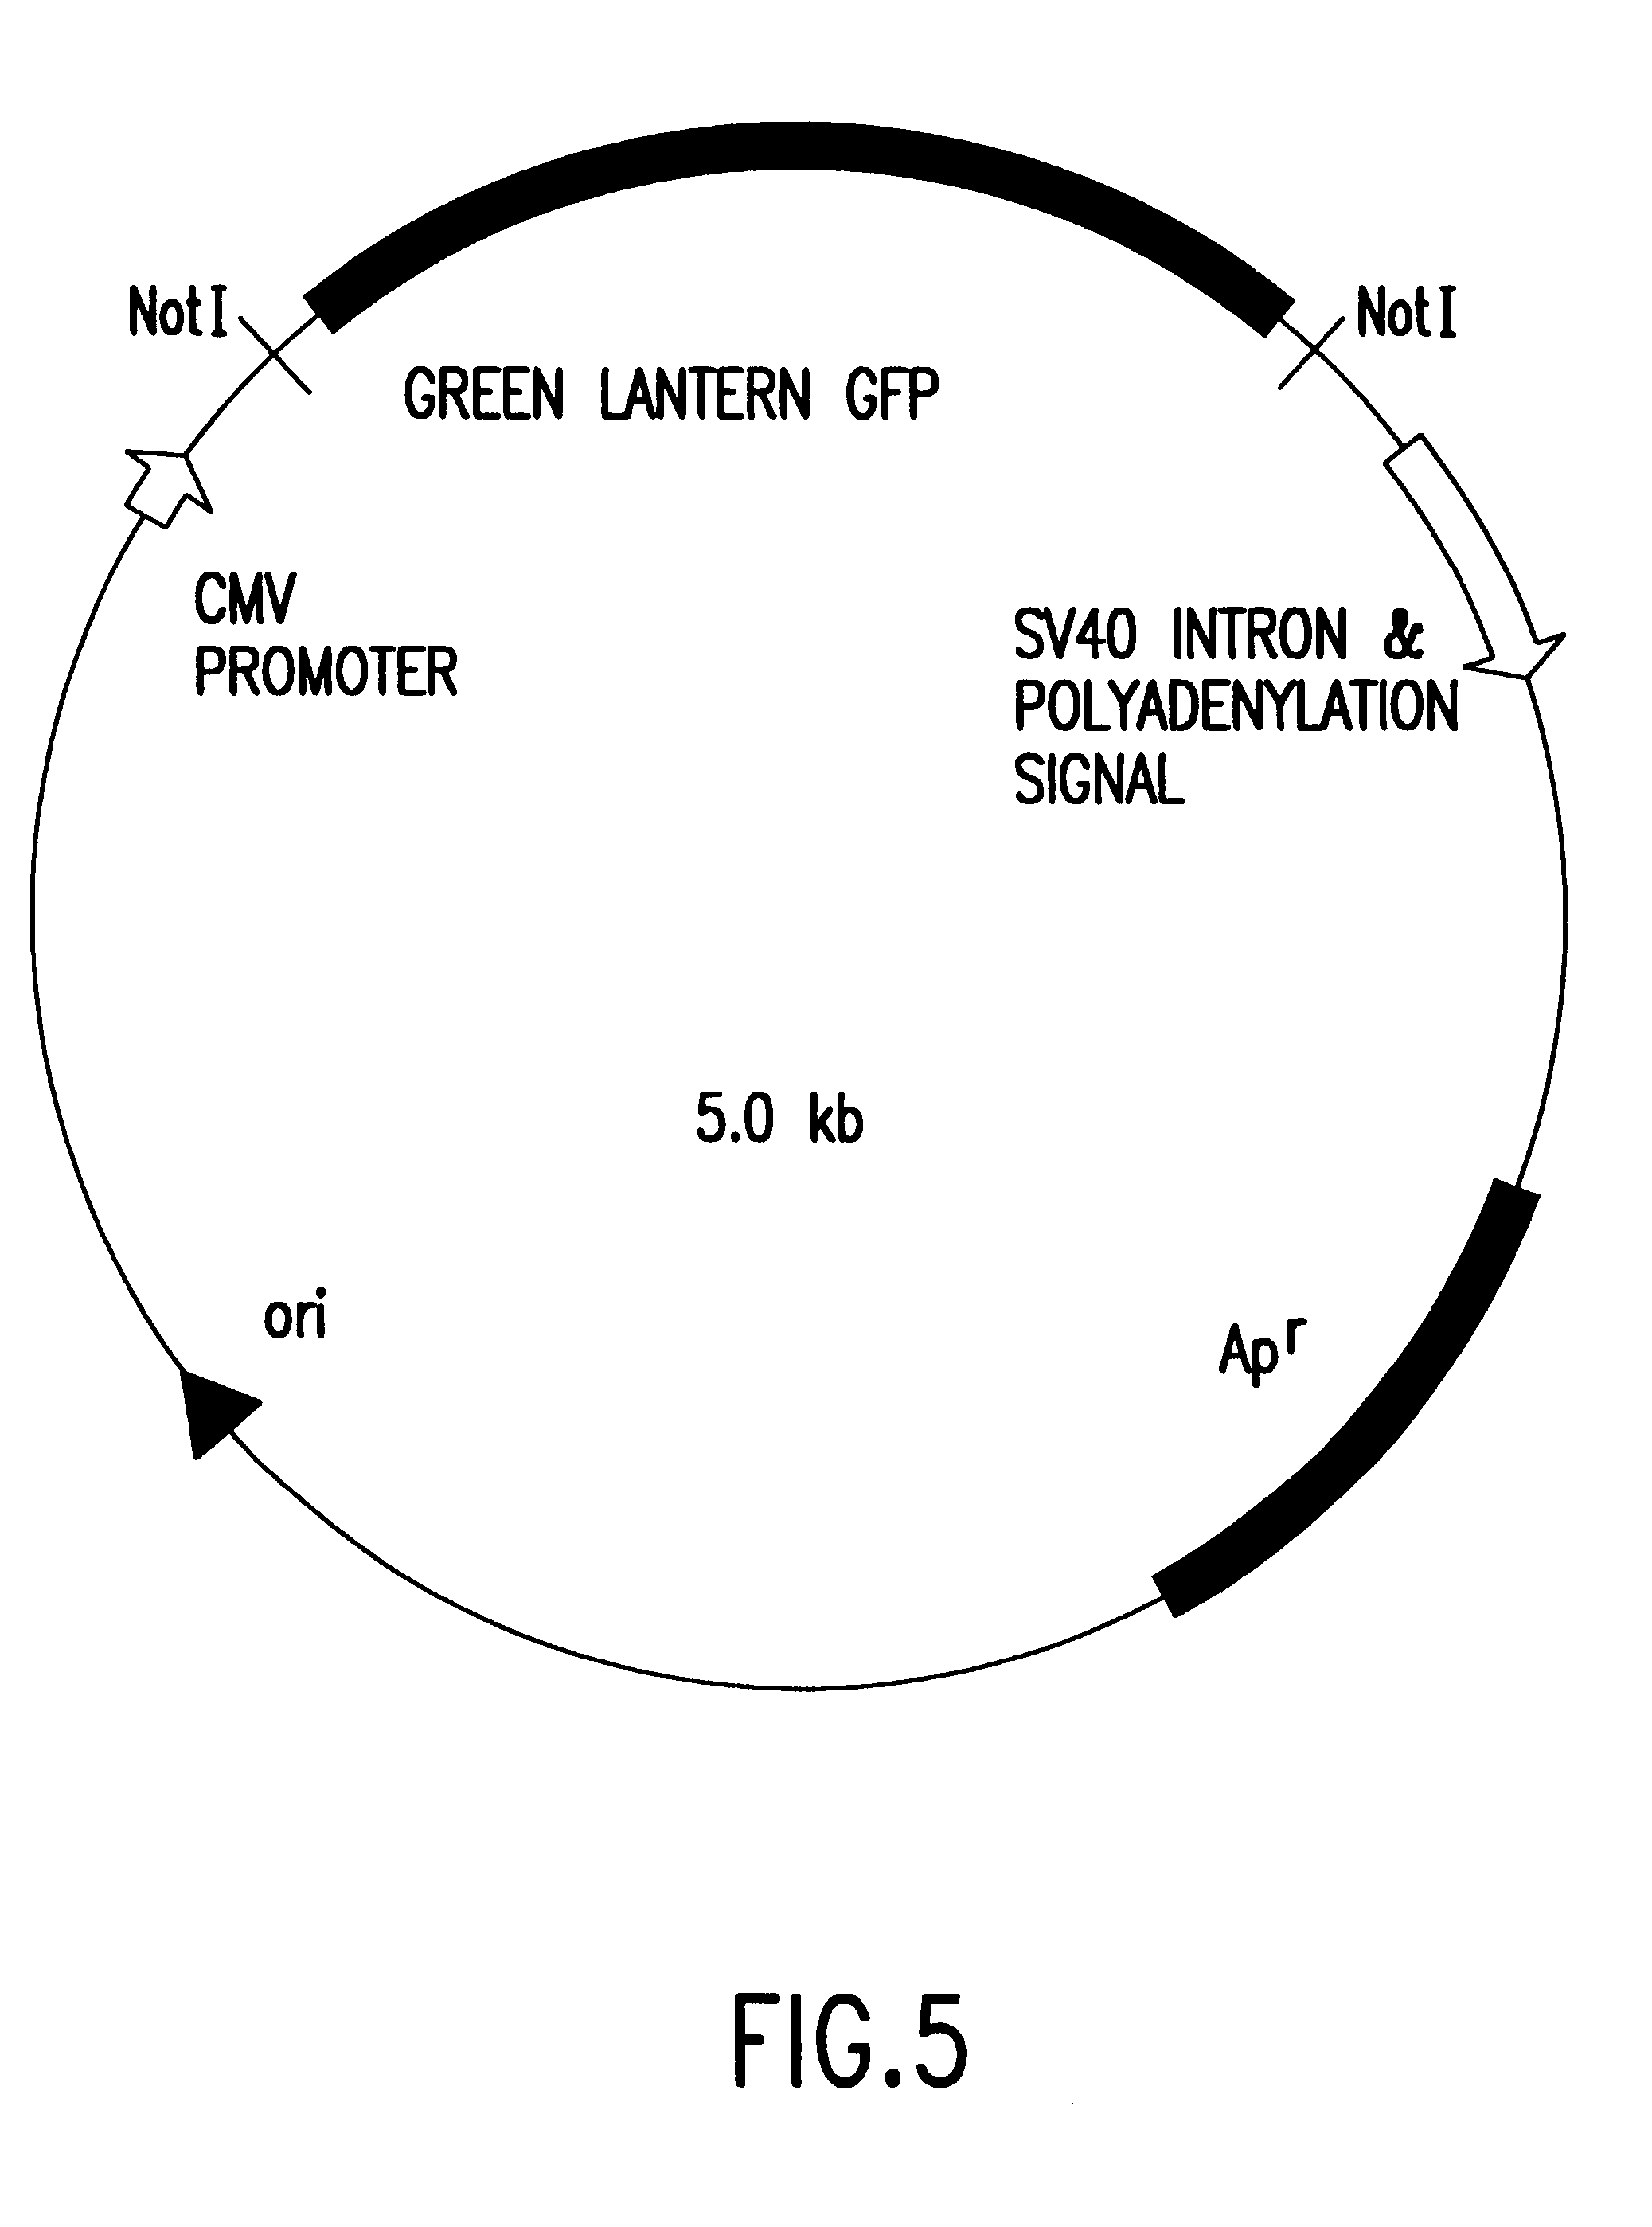

In [27]:
from IPython.display import Image
Image("https://patentimages.storage.googleapis.com/US6638732B1/US06638732-20031028-D00005.png", width=300)

The map below was made with [plasmapper](http://wishart.biology.ualberta.ca/PlasMapper/) and it corresponds roughly to the map from the patent above.

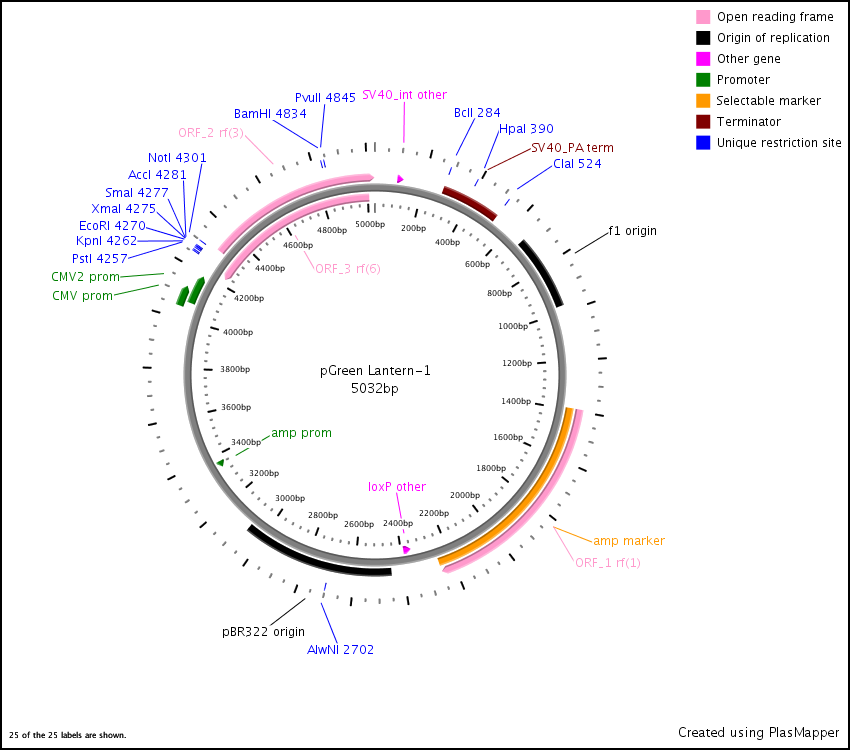

In [28]:
Image("plasMap203_1479761881670.png", width=600)